In [2]:
# Import Necessary Libraries

import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf
#from nsepy import get_history

In [3]:
#sbin=pd.read_csv('bitcoin.csv')
sbin=pd.read_csv('CSI_300.csv')

df_close=sbin['Close'].reset_index()

print(sbin.head(-10))
print(sbin.info())



           Date    Close      Open      High       Low     Vol. Change %
0     8/27/2024  3304.38  3,315.69  3,320.57  3,301.79   79.89K   -0.60%
1     8/26/2024  3324.22  3,330.72  3,336.53  3,311.57   93.99K   -0.09%
2     8/23/2024  3327.19  3,305.93  3,336.24  3,305.64   89.53K    0.42%
3     8/22/2024  3313.14  3,322.87  3,327.70  3,305.25  100.37K   -0.26%
4     8/21/2024  3321.64  3,322.91  3,339.44  3,307.99   89.96K   -0.33%
...         ...      ...       ...       ...       ...      ...      ...
4763  1/24/2005   998.13  1,001.85  1,001.85    986.24   14.36K    1.58%
4764  1/21/2005   982.60    954.46    984.27    943.44   14.45K    2.76%
4765  1/20/2005   956.25    963.21    963.21    952.23    7.73K   -1.13%
4766  1/19/2005   967.21    974.33    974.33    965.26    6.34K   -0.77%
4767  1/18/2005   974.69    967.37    974.87    960.29    7.31K    0.75%

[4768 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 7 col

In [4]:

sbin['Close'] = pd.to_numeric(sbin['Close'])

#sbin['Open'] = pd.to_numeric(sbin['Open'], errors='coerce')
#sbin['High'] = pd.to_numeric(sbin['High'], errors='coerce')

sbin['Date'] = pd.to_datetime(sbin['Date'], errors='coerce')
print(sbin.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4778 non-null   datetime64[ns]
 1   Close     4778 non-null   float64       
 2   Open      4778 non-null   object        
 3   High      4778 non-null   object        
 4   Low       4778 non-null   object        
 5   Vol.      4778 non-null   object        
 6   Change %  4778 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 261.4+ KB
None


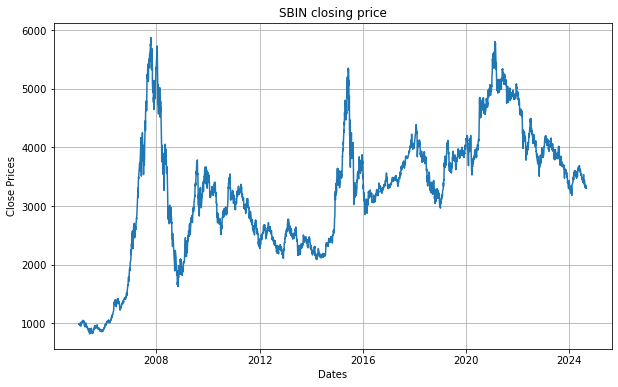

In [5]:
# Plotting Time data

plt.figure(figsize=(10,6))
plt.grid(True)

plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Date'],sbin['Close'])
plt.title('SBIN closing price')
plt.show()

In [6]:
# Re-arranging Index

df1=sbin.iloc[::-1]
print(df1.head())
print(df1.shape)
df2=pd.DataFrame(data=df1.values, columns=df1.columns, index=range(0,df1.shape[0]))
print(df2.head())

           Date   Close    Open    High     Low   Vol. Change %
4777 2005-01-04  982.79  994.77  994.77  980.66  7.41K   -1.72%
4776 2005-01-05  992.56  981.58  997.32  979.88  7.12K    0.99%
4775 2005-01-06  983.17  993.33  993.79  980.33  6.29K   -0.95%
4774 2005-01-07  983.96  983.05  995.71  979.81  7.30K    0.08%
4773 2005-01-10  993.88  983.76  993.96  979.79  5.79K    1.01%
(4778, 7)
        Date   Close    Open    High     Low   Vol. Change %
0 2005-01-04  982.79  994.77  994.77  980.66  7.41K   -1.72%
1 2005-01-05  992.56  981.58  997.32  979.88  7.12K    0.99%
2 2005-01-06  983.17  993.33  993.79  980.33  6.29K   -0.95%
3 2005-01-07  983.96  983.05  995.71  979.81  7.30K    0.08%
4 2005-01-10  993.88  983.76  993.96  979.79  5.79K    1.01%


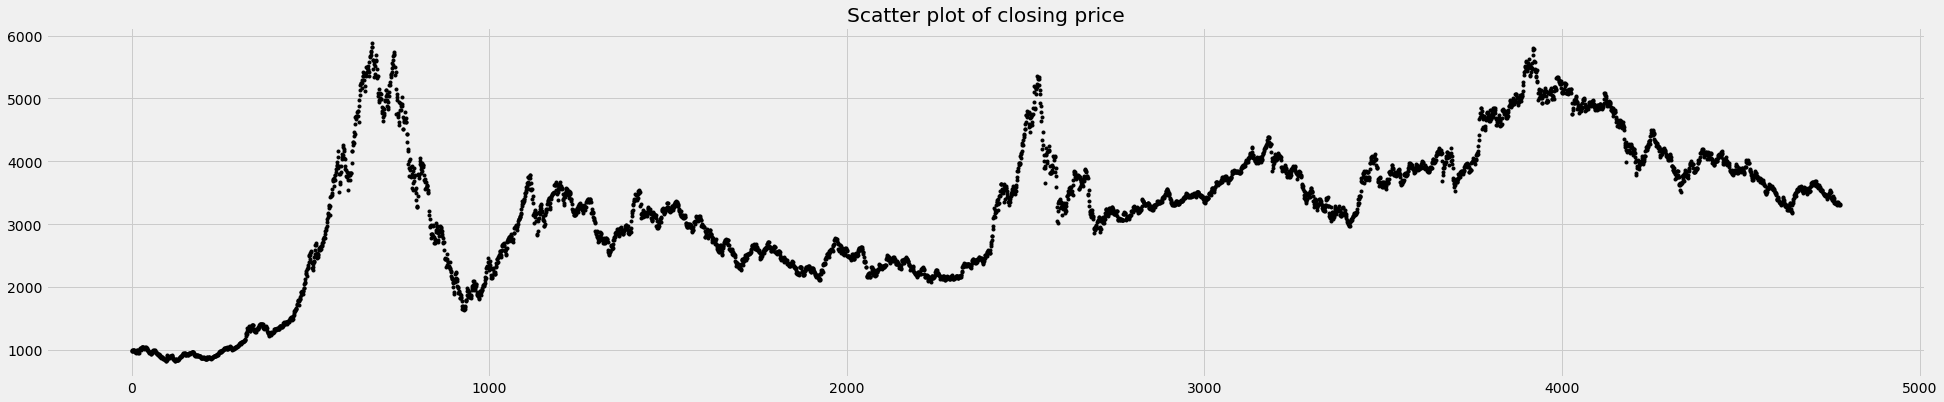

In [16]:
# Scatter Plot of re-arranged indexed dataframe


plt.figure(figsize=(30,6))
df_close = df2['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

In [8]:
print(df1.describe())

             Close
count  4778.000000
mean   3234.891798
std    1084.464383
min     818.030000
25%    2504.757500
50%    3338.620000
75%    3902.735000
max    5877.200000


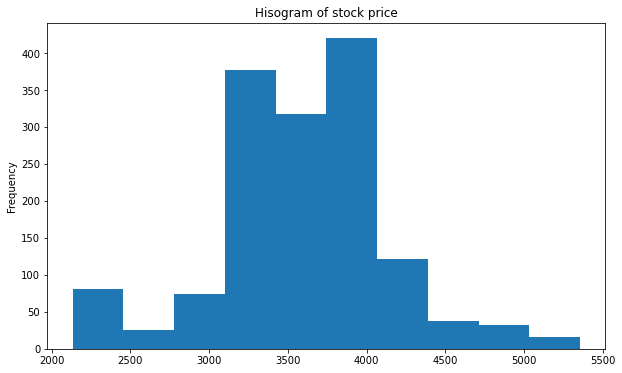

In [13]:
# Histogram of Closing Price of BitCoin

plt.figure(figsize=(10,6))
#df_close = sbin.Close[sbin.Close.index[::-1]].values
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of stock price')
plt.show()

Neural Network

In [14]:
# import libraries

import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import yfinance as yf

plt.style.use('fivethirtyeight')

In [17]:
# Selecting data points as the paper

#idxs=df2.index[df2['Date']=='2011-01-06'].values
idxs=df2.index[df2['Date']=='2005-01-18'].values

#print(idxs, df2.Close[idxs])
#print(idxs)
idxn=df2.index[df2['Date']=='2021-03-17'].values
#print('ddd',idxn)

dataT=df2.filter(['Close'])  # Total dataset

data=dataT[int(idxs):int(idxn)]  # Dataset equal to the paper

#print(data)
dataset=data.values
#print('dataset = ', dataset)


In [18]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

#print(scaled_data)

In [54]:
# Create the training dataset


training_data_len=math.ceil(len(dataset)* 0.822)  # 15% of paper dataset is test
print(training_data_len)



train_data=scaled_data[0:training_data_len,:]

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    #if i <=61:
        #print(x_train)
        #print(y_train)

        
# create Test dataset


        
test_data=scaled_data[training_data_len -60: , :]

x_test=[]
y_test= dataset [training_data_len:, :]



for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

3230


In [56]:
#convert x_train and y_train to numpy array


x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)


# convert data to numpy array 

x_test= np.array(x_test)
print(x_test.shape)



(3170, 60)
(699, 60)


In [57]:
#reshape the data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
print(x_train.shape)


x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
print(x_test.shape)



(3170, 60, 1)
(699, 60, 1)


# Model Create and train 

In [100]:
# LSTM-Attention-Dense


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt



# Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

# Model Definition
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
#x = LSTM(30, return_sequences = True, input_shape = (60,1))(inputs)
x = LSTM(60, return_sequences = True, input_shape = (60,1))(inputs)
#x = LSTM(20, return_sequences = False)(x)
x = LSTM(60, return_sequences = False)(x)
#x = Reshape((20,1))(x)
x = Reshape((60,1))(x)
x = Dropout(0.1)(x)
x = transformer_encoder(x, head_size=120, num_heads=5, ff_dim=5, dropout=0.15)
#x = transformer_encoder(x, head_size=15, num_heads=4, ff_dim=4, dropout=0.15)

x = GlobalAveragePooling1D(data_format='channels_first')(x)
x = Dropout(0.1)(x)
#x = Dense(50, activation="relu")(x)
#x = Dropout(0.1)(x)

x = Dense(30, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


history = model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 lstm_10 (LSTM)              (None, 60, 60)               14880     ['input_6[0][0]']             
                                                                                                  
 lstm_11 (LSTM)              (None, 60)                   29040     ['lstm_10[0][0]']             
                                                                                                  
 reshape_5 (Reshape)         (None, 60, 1)                0         ['lstm_11[0][0]']             
                                                                                            

Text(0.5, 1.0, 'Loss versus Epoch curve')

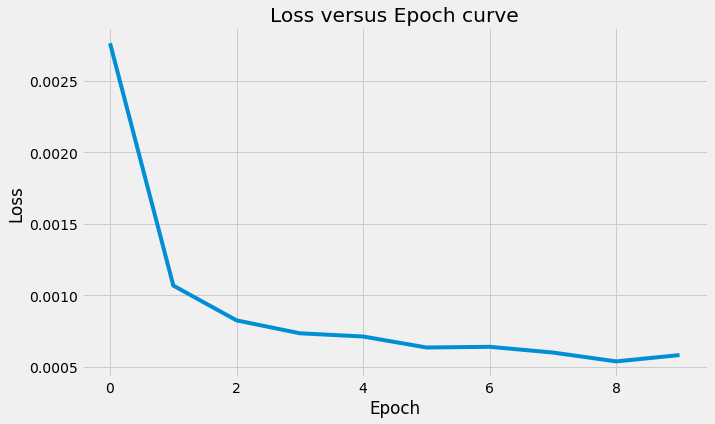

In [101]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss versus Epoch curve')

In [58]:
## Only Dense Model 


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, GlobalAveragePooling1D, Reshape
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


model=Sequential()
model.add(Dense(80, input_shape = (60,1)))
model.add(Flatten())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

model.summary()
#from sklearn.metrics import classification_report, confusion_matrix

model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60, 80)            160       
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 dense_1 (Dense)             (None, 80)                384080    
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 81        
                                                                 
Total params: 390801 (1.49 MB)
Trainable params: 390801 

In [123]:
# More Training (if Required)

model.fit(x_train, y_train, batch_size=1, epochs=2, use_multiprocessing=True, workers=12)



Epoch 1/2
3170/3170 [==============================] - 37s 12ms/step - loss: 4.7846e-04
Epoch 2/2
3170/3170 [==============================] - 37s 12ms/step - loss: 4.1502e-04


In [124]:
# Get the models predicted price values

predictions = model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



22/22 [==============================] - 1s 23ms/step
(699, 1)


In [125]:
#Get the root mean squared error (RMSE) 
rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

r2 = r2_score(y_test, predictions)
evs = explained_variance_score(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mpe = np.mean((y_test - predictions) / y_test) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Root Mean Square Error 97.57289808265061
Mean Squared Error (MSE): 9520.470440247325
Root-Mean Squared Error (RMSE): 97.57289808265062
Mean Absolute Error (MAE): 84.02036950107295
R2 Score: 0.9765345466605059
Explained Variance Score: 0.9915947489298246
Mean Absolute Percentage Error (MAPE): 2.170654742552354
Mean Percentage Error (MPE): -2.0424118084452476


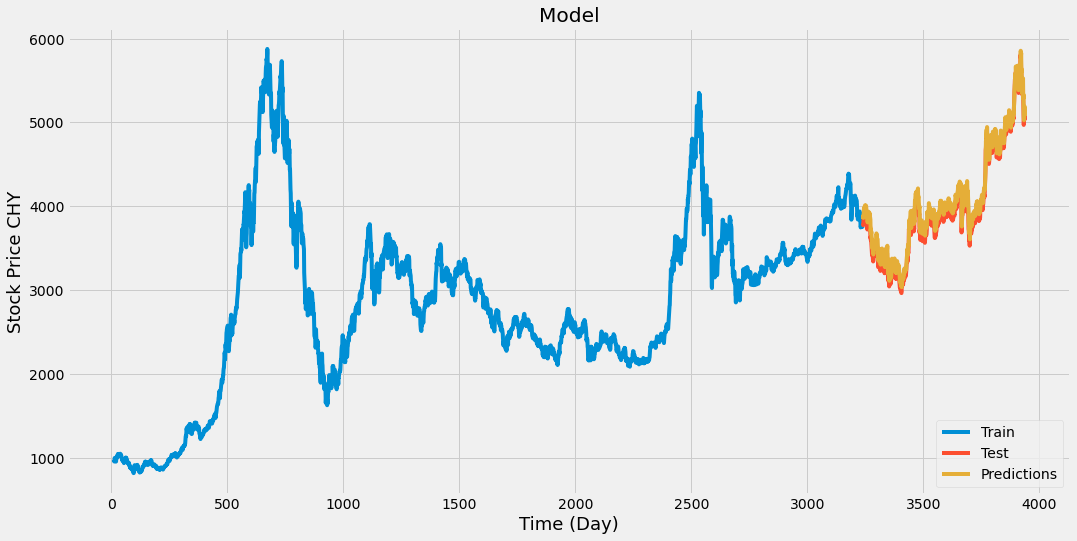

In [126]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Time (Day)', fontsize=18)
plt.ylabel('Stock Price CHY', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Test', 'Predictions'], loc = 'lower right')

42.69384610632738


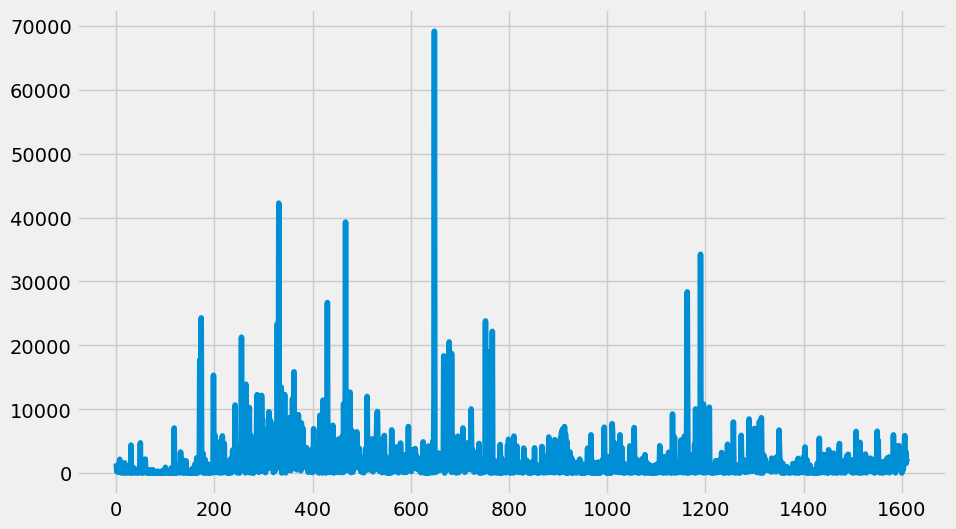

In [29]:
error=((y_test-predictions)**2)
plt.plot(error)

print(np.sqrt(np.sum(error)/len(error)))

In [30]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

#keras.utils.plot_model(model1, "Model1.png", show_shapes=True)
#keras.utils.plot_model(model2, "Model2.png", show_shapes=True)

NameError: name 'keras' is not defined

# Model and session save

In [111]:
import dill                            #pip install dill --user
import keras

# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("LSTMTransDense_CSI_300_57.72.keras")

filename = 'globalsave_LSTMTransDense_CSI_300_57.72.pkl'
dill.dump_session(filename)



# It can be used to reconstruct the model identically.
#reconstructed_model = keras.models.load_model("LSTM_model.keras")
#model = keras.models.load_model('LSTM_model.keras')
# Let's check:
#np.testing.assert_allclose(
#    model.predict(test_input), reconstructed_model.predict(test_input)
#)

TypeError: cannot pickle 'tensorflow.python.framework._pywrap_python_api_dispatcher.PythonAPIDispatcher' object

In [112]:
## Saving as pickle file


import pickle

# save the iris classification model as a pickle file
model_pkl_file = "LSTMTransDense_CSI_300_57.72.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

# Saved Model Load from Disk

In [113]:
# load model from keras file


import numpy as np
import keras
import dill                            #pip install dill --user


#filename = 'globalsave_LSTM.pkl'

#dill.load_session(filename)

reconstructed_model = keras.models.load_model("LSTMTransDense_CSI_300_57.72.keras")

# Let's check:
np.testing.assert_allclose(
    reconstructed_model.predict(x_test), reconstructed_model.predict(x_test)
)


22/22 [==============================] - 0s 21ms/step


In [115]:
import pickle

model_pkl_file = "LSTMTransDense_CSI_300_57.72.pkl" 

with open(model_pkl_file, 'rb') as file:  
    reconstructed_model = pickle.load(file)


        
# evaluate model 
y_predict = reconstructed_model.predict(x_test)

# check results
#print(classification_report(y_test, y_predict)) 

22/22 [==============================] - 1s 22ms/step


In [116]:
reconstructed_model.summary()



predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)


rmse= np.sqrt( np.mean((predictions - y_test)**2))
print('Root Mean Square Error',rmse)

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 60, 1)]              0         []                            
                                                                                                  
 lstm_10 (LSTM)              (None, 60, 60)               14880     ['input_6[0][0]']             
                                                                                                  
 lstm_11 (LSTM)              (None, 60)                   29040     ['lstm_10[0][0]']             
                                                                                                  
 reshape_5 (Reshape)         (None, 60, 1)                0         ['lstm_11[0][0]']             
                                                                                            

In [39]:
#plot the data

train=data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc = 'lower right')

ValueError: Length of values (4355) does not match length of index (1612)

In [17]:
#reconstructed_model = keras.models.load_model(
#    "LSTM_model.keras",
#    custom_objects={"CustomLayer": CustomLayer, "custom_fn": custom_fn},
#)

# Test Dataset!

In [40]:
##############################  TEST #######################


data_new=dataT[3674:]
print(data_new.shape)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_new=scaler.fit_transform(data_new)
#y_test= dataset [training_data_len:, :]
test_data_new=scaled_data_new
print(scaled_data_new)


x_test=[]
y_test= data_new[60:]


for i in range (60, len(test_data_new)):
    x_test.append(test_data_new[i-60:i,0])

x_test= np.array(x_test)

print(x_test.shape)

x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

    

#print(x_test)
#print(y_test)


(4415, 1)
[[0.        ]
 [0.00085406]
 [0.00177861]
 ...
 [0.33476952]
 [0.34286894]
 [0.35016064]]
(4355, 60)


In [41]:
predictions = reconstructed_model.predict(x_test)
print(predictions.shape)

predictions=np.reshape(predictions,(predictions.shape[0], predictions.shape[1]))
#print(x_test.shape)

# un-scaling 
predictions = scaler.inverse_transform(predictions)



137/137 [==============================] - 1s 5ms/step
(4355, 1)


In [42]:
#Get the root mean squared error (RMSE) 

rmse= np.sqrt( np.mean((predictions - y_test)**2))
rmse


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Calculate test metrics
mse = mean_squared_error(y_test.values, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test.values, predictions)

r2 = r2_score(y_test.values, predictions)
evs = explained_variance_score(y_test.values, predictions)

mape = np.mean(np.abs((y_test.values, predictions) / y_test.values)) * 100
mpe = np.mean((y_test.values, predictions) / y_test.values) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root-Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Mean Percentage Error (MPE): {mpe}")

Mean Squared Error (MSE): 8229.15877496496
Root-Mean Squared Error (RMSE): 90.71471090713436
Mean Absolute Error (MAE): 71.74078110424439
R2 Score: 0.983287971932333
Explained Variance Score: 0.9912581548544676
Mean Absolute Percentage Error (MAPE): 101.29260654512046
Mean Percentage Error (MPE): 101.29260654512046


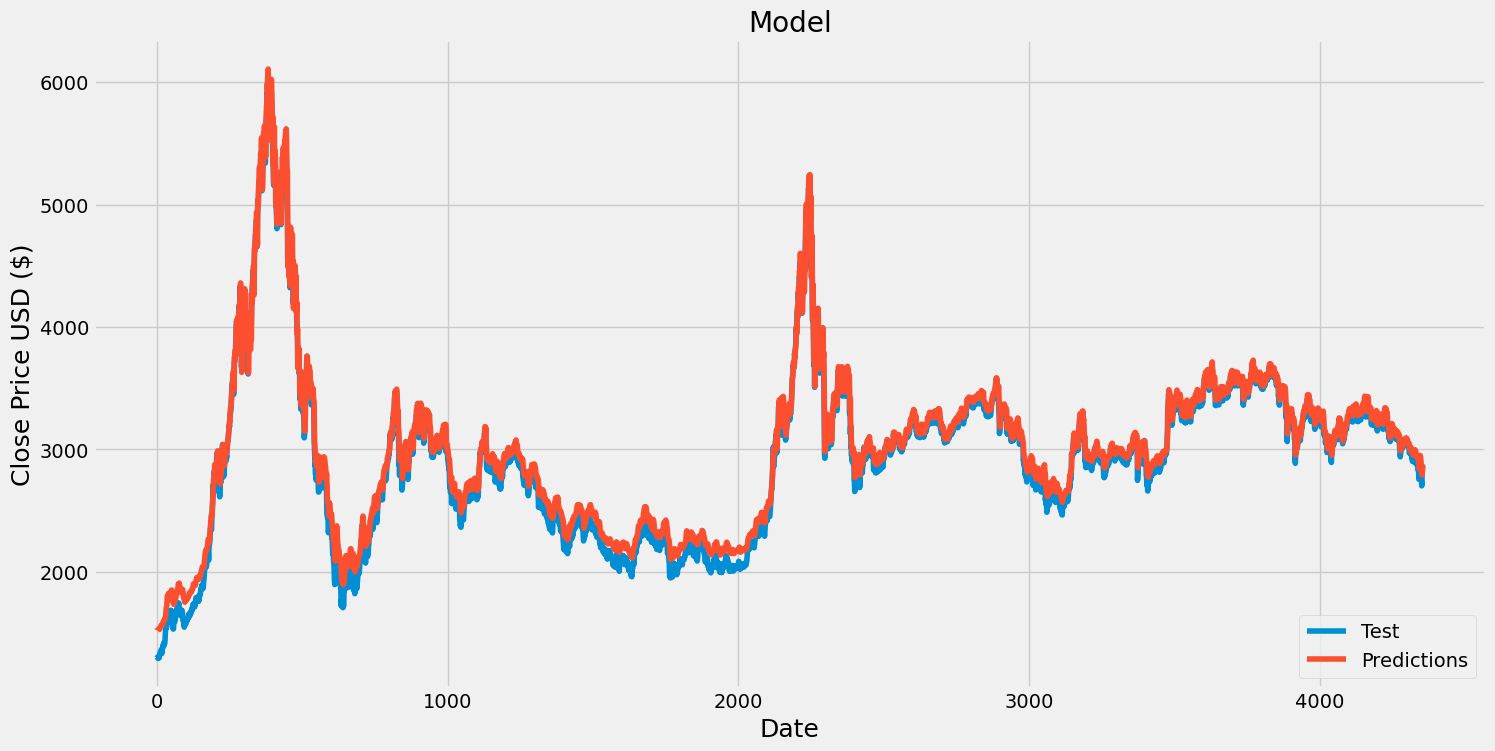

In [43]:
#train=data[:training_data_len]
#valid = data[training_data_len:]
#valid['Predictions']=predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_test.values)
plt.plot(predictions)

#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Test', 'Predictions'], loc = 'lower right')

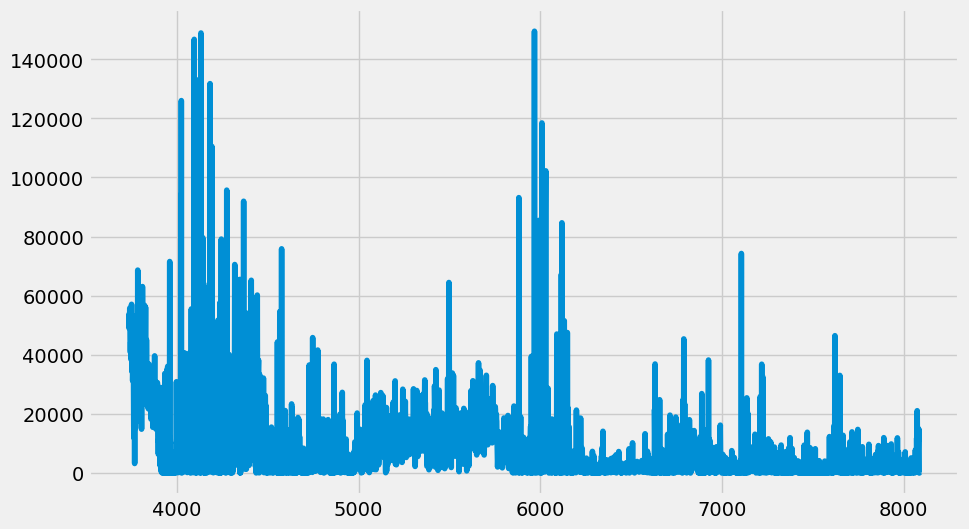

In [44]:
error=((y_test-predictions)**2)
plt.plot(error)

#rmse= np.sqrt(np.sum(error)/len(error))
#print(rmse)

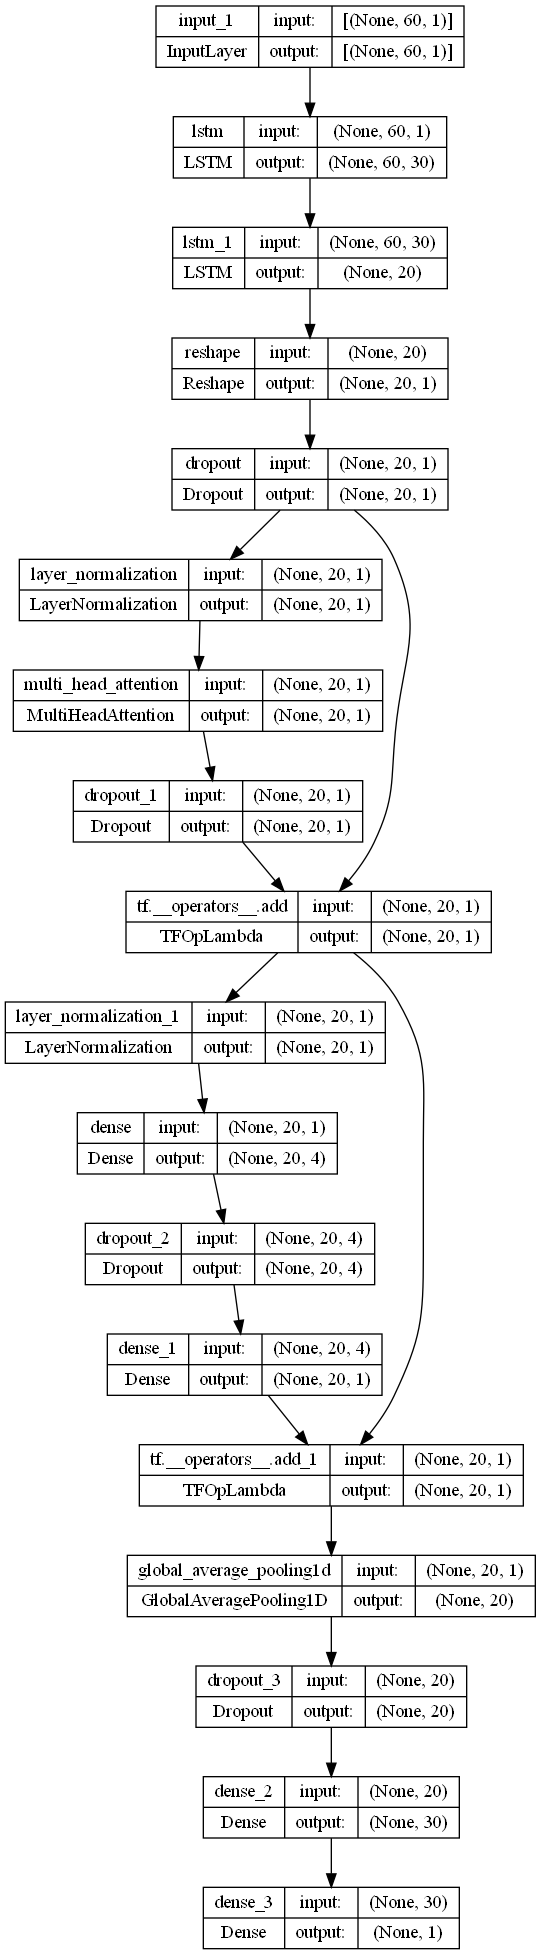

In [16]:
import keras

keras.utils.plot_model(model, "ensemble_model.png", show_shapes=True)

In [18]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     -------------------------------------- 45.0/45.0 kB 445.0 kB/s eta 0:00:00


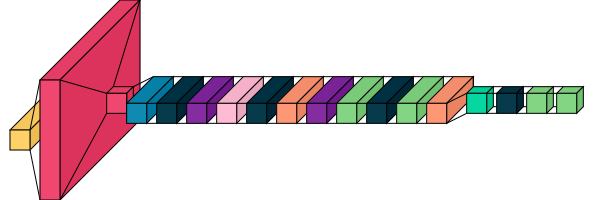

In [19]:
import visualkeras

#model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [34]:
import torch
from torchviz import make_dot

# create some sample input data
x = torch.randn(1, 3, 256, 256)

# generate predictions for the sample data
y = MyPyTorchModel()(x)

# generate a model architecture visualization
make_dot(y.mean(),
         params=dict(MyPyTorchModel().named_parameters()),
         show_attrs=True,
         show_saved=True).render("MyPyTorchModel_torchviz", format="png")

ModuleNotFoundError: No module named 'torchviz'

In [32]:
!pip install neutron

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 4.3/4.3 MB 626.1 kB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 655.0 kB/s eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 295.5/295.5 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 289.3/289.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 75.8/75.8 kB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 129.5/129.5 kB ? eta 0:00:00
     -------------------------------------- 132.1/132.1 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 112.9/112.9 kB 3.2 MB/s eta 0:00:00
     ------------------------------------ 107.5/107.5 kB 568.8 kB/s eta 0:00:00
     -------------------------

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [7 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsDeprecationWarning: The license_file parameter is deprecated, use license_files instead.
    warnings.warn(msg, warning_class)
  running bdist_wheel
  running build
  running build_ext
  building 'netifaces' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for netifaces
  error: subprocess-exited-with-error
  
  Running setup.py install for netifaces did not run successfully.
  exit code: 1
  
  [9 lines of output]
  C:\Users\dipayan\anaconda3\lib\site-packages\setuptools\config\setupcfg.py:463: SetuptoolsD

In [33]:
import neutron
neutron.start('LSTM_attention_model1.keras')

ModuleNotFoundError: No module named 'neutron'